In [18]:
# %load example1a_small
"""small example"""
import sys
sys.path.append("../../..")
import plantbox as pb
import vtk_plot as vp

rs = pb.RootSystem()

# Open plant and root parameter from a file
path = "../../../modelparameter/rootsystem/RootLab/" # POZOR, vnoril jsem si slozku RootLab
name = "LabMod_Bush"
rs.readParameters(path + name + ".xml")

# Initializeo
rs.initialize()

# Simulate
rs.simulate(20, True)
vp.plot_roots(rs, "creationTime")

((vtkRenderingOpenGL2Python.vtkOpenGLActor)0x7fc8b79d8590,
 (vtkRenderingAnnotationPython.vtkScalarBarActor)0x7fc8b79d84b0)

In [53]:
# Export final result (as vtp)
#rs.write("resultsLAB/RLab201012_Heliantus_Pagès_2013.vtp")

# Export final result as rsml 
# nefunguje - vt.write_rsml("resultsLAB/Triticum_aestivum_LAB201006.rsml", rs, "meta")
# FUNGUJE - rs.write("resultsLAB/test.rsml")

# Plot, using vtk
#vp.plot_roots(rs, "creationTime")
# cubeAxesActor = vtk.vtkCubeAxesActor()
# cubeAxesActor.SetBounds(rs.GetOutput().GetBounds())
# cubeAxesActor.SetCamera(renderer.GetActiveCamera())

#help(rs.getNodes())
#dir(rs)
#print(rs.getNodes())
Nodes = rs.getNodes() # 
#print(Nodes[9].y)

# ve vtk_plpot jako BOUNDS
nNodes=len(Nodes)

xx=[0] * nNodes
yy=[0] * nNodes
zz=[0] * nNodes
for i in range(0, nNodes):
    xx[i]=Nodes[i].x
    yy[i]=Nodes[i].y
    zz[i]=Nodes[i].z

xmax=max(xx)
ymax=max(yy)
zmax=max(zz)
print(xmax)

xmin=min(xx)
ymin=min(yy)
zmin=min(zz)
print(ymin)

xc=(xmax+xmin)/2
yc=(ymax+ymin)/2
zc=(zmax+zmin)/2

dx=(xmax-xc)*1.2
xmax=xc+dx
xmin=xc-dx
dy=(ymax-yc)*1.2
ymax=yc+dy
ymin=yc-dy
dz=(zmax-zc)*1.2
zmax=zc+dz
zmin=zc-dz


cubeAxesActor = vp.vtk.vtkCubeAxesActor()
cubeAxesActor.SetBounds(xmin,xmax,ymin,ymax,zmin,zmax)
#cubeAxesActor.SetCamera(vp.ren.GetActiveCamera())
#vp.ren.ResetCamera()
vp.ren.AddActor(CubeAxesActor);
vp.plot_roots(rs, "creationTime")


#limits = 'no' # dat sem nalezena maxima z Nodes[] ...

18.88492884968773
-26.333050969978665


AttributeError: module 'vtk_plot' has no attribute 'ren'

run 1
run 2
run 3
run 4
run 5
run 6
run 7
run 8
run 9
run 10
run 11
run 12
run 13
run 14
run 15
run 16
run 17
run 18
run 19
run 20
run 21
run 22
run 23
run 24
run 25


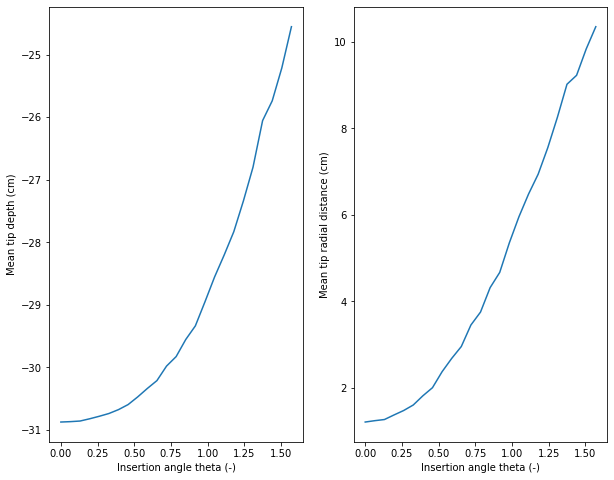

In [10]:
# %load example2f_sensitivity.py
"""sensitivity analysis: impact of insertion angle on root tip distribution"""
import sys
sys.path.append("../../..")
import plantbox as pb

import math
from multiprocessing import Pool
import numpy as np
import matplotlib.pyplot as plt


# sets all standard deviation to a percantage, i.e. value*s
def set_all_sd(rs, s):
    for p in rs.getRootRandomParameter():
        p.lmaxs = p.lmaxs * s
        p.lbs = p.lb * s
        p.las = p.la * s
        p.lns = p.ln * s
        p.rs = p.r * s
        p.a_s = p.a * s


# Parameters
path = "../../../modelparameter/rootsystem/"
name = "Zea_mays_1_Leitner_2010"
simtime = 25
N = 25  # resolution of paramter
runs = 25  # iterations
theta0_ = np.linspace(0, math.pi / 2, N)


# One simulation
def simulate(i):
    rs = pb.RootSystem()
    rs.readParameters(path + name + ".xml")
    set_all_sd(rs, 0.)  # set all sd to zero
    p1 = rs.getRootRandomParameter(1)  # tap and basal root type
    # 1. vary parameter
    p1.theta = theta0_[i]
    # 2. simulate
    rs.initializeLB(1, 1, False)
    rs.simulate(simtime, False)
    # 3. calculate target
    depth = 0.  # mean depth
    rad_dist = 0.  # mean raidal distance
    roots = rs.getPolylines()
    for r in roots:
        depth += r[-1].z
        rad_dist += math.hypot(r[-1].x, r[-1].y)
    depth /= len(roots)
    rad_dist /= len(roots)
    return depth, rad_dist


depth_ = np.zeros(N)
rad_dist_ = np.zeros(N)

for r in range(0, runs):

    print("run", r + 1)

    # Parallel execution
    param = []  # param is a list of tuples
    for i in range(0, N):
        param.append((i,))
    pool = Pool()
    output = pool.starmap(simulate, param)
    pool.close()

    # Copy results
    for i, o in enumerate(output):
        depth_[i] += (o[0] / runs)
        rad_dist_[i] += (o[1] / runs)

# Figure
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 8))
axes[0].set_xlabel('Insertion angle theta (-)')
axes[1].set_xlabel('Insertion angle theta (-)')
axes[0].set_ylabel('Mean tip depth (cm)')
axes[1].set_ylabel('Mean tip radial distance (cm)')
axes[0].plot(theta0_, depth_)
axes[1].plot(theta0_, rad_dist_)
fig.subplots_adjust()
plt.savefig("results/example_2f.png")
plt.show()


#### Oblibene IPython magics

In [ ]:
%%writefile
%pycat
%load

In [ ]:
%% magicwords help

In [ ]:
%pycat example1_LAB200811_multiple.py

In [ ]:
import example2a_initializeparams

In [ ]:
import example2c_lateralspacing

In [ ]:
import example2d_length

In [ ]:
import example2e_roottips

## WIP

In [2]:
#%%writefile example1_LAB201006_multiple_hydrotropism_Nov21.py
"""hydrotropism in a middle of a two plants"""
import sys; sys.path.append("../../..")
import plantbox as pb
import vtk_plot as vp

rs = pb.RootSystem()
path = "../../../modelparameter/rootsystem/RootLab/"
name = ["LabMod_Bush", "../Juncus_squarrosus_Clausnitzer_1994", "LabMod_Bush", "LabMod_Bush"]

# Static soil property in a thin layer
maxS = 5  # maximal
minS = 0.5  # minimal
slope = 10  # linear gradient between min and max (cm), half length of linear interpolation between fmax and fmin
box = pb.SDF_PlantBox(200, 200, 30)  # cm
layer = pb.SDF_RotateTranslate(box, pb.Vector3d(0, 0, 10))
box2 = pb.SDF_PlantBox(200, 200, 60)
layer2 = pb.SDF_RotateTranslate(box2, pb.Vector3d(0, 0, -150))
soil_prop = pb.SoilLookUpSDF(layer, maxS, minS, slope)

C = 1   # number of columns
R = 1   # and rows
dist = 35  # distance between the root systems [cm]

# Initializes C*R root systems
allRS = []
for i in range(0, C):
    for j in range(0, R):
        rs = pb.RootSystem()
        rs.readParameters(path + name[i] + ".xml")
        # Manually set tropism to hydrotropism for the first six root types
        sigma = [0.05, 0.3, 0.5, 0.6]
        tropN = [0.7, 0.8, 1.0, 1.0] # *2 strength of tropism
        #RootLifeTime = [50, 40, 40, 30]
        #for p in rs.getRootRandomParameter():
            #p.dx = 0.5  # adjust resolution
            #p.tropismT = pb.TropismType.hydro
            #p.tropismN = tropN[p.subType - 1]  # strength of tropism
            #p.tropismS = sigma[p.subType - 1]
            #p.rlt = RootLifeTime[i]
            
        rs.getRootSystemParameter().seedPos = pb.Vector3d(dist * i - (dist/2), dist * j, -4.)  # cm
        rs.setSoil(soil_prop) # Set the soil properties before calling initialize
        rs.initialize(False)  # verbose = False
        allRS.append(rs)
        
# Simulate dynamically
simtime = 90  # e.g. 30 or 60 days
dt = 1
N = round(simtime / dt)
for _ in range(0, N):
    for rs in allRS:
        ## in a dynamic soil setting you would need to update the soil properties (soil_prop)
        rs.simulate(dt, True)
    
# Export results as single vtp files (as polylines)
ana = pb.SegmentAnalyser()  # see example 3b
for i, rs in enumerate(allRS):
      vtpname = "resultsLAB/RLab_201121_Bush" + str(i) + ".vtp"
      rs.write(vtpname)
      ana.addSegments(rs)  # collect all
    
vp.plot_roots(ana, 'subType', "Multiple Hydro", True) # misto creationTime muze byt napr. subType ...



((vtkRenderingOpenGL2Python.vtkOpenGLActor)0x7efc77c28d70,
 (vtkRenderingAnnotationPython.vtkScalarBarActor)0x7efc77c28fa0)

In [7]:
# %load example1_LAB200903_multiple_hydrotropism_centerWORKS.py


((vtkRenderingOpenGL2Python.vtkOpenGLActor)0x7fc18049ebb0,
 (vtkRenderingAnnotationPython.vtkScalarBarActor)0x7fc18049ec20)

In [8]:
N = [0.5, 1., 2.] * 2
print(N)

[0.5, 1.0, 2.0, 0.5, 1.0, 2.0]


# odkladiste

In [ ]:
        
# Simulate dynamically
simtime = 25  # e.g. 30 or 60 days
dt = 1
N = round(simtime / dt)
for _ in range(0, N):
    for rs in allRS:
        ## in a dynamic soil setting you would need to update the soil properties (soil_prop)
        rs.simulate(dt, True)

# Simulate
for rs in allRS:
    rs.simulate(simtime, True)  # verbose = False


# Export results as single vtp files (as polylines)
ana = pb.SegmentAnalyser()  # see example 3b
for i, rs in enumerate(allRS):
      vtpname = "results/example_LAB_multiple_hydrotrop" + str(i) + ".vtp"
#      rs.write(vtpname)
      ana.addSegments(rs)  # collect all

# Plot, using vtk
#vp.plot_roots(rs, 'subType', 'oblique', True)
vp.plot_roots(ana, 'subType', "Multiple Hydro", True)

# testujeme kod
# print(pb.SoilLookUpSDF)

In [ ]:
# %load example4a_hydrotropism.py
"""hydrotropism in a thin layer"""
import sys; sys.path.append("../../..")
import plantbox as pb
import vtk_plot as vp

rs = pb.RootSystem()
path = "../../../modelparameter/rootsystem/"
name = "Anagallis_femina_Leitner_2010"
rs.readParameters(path + name + ".xml")

# Manually set tropism to hydrotropism for the first ten root types
sigma = [0.4, 1., 1., 1., 1. ] * 2
for p in rs.getRootRandomParameter():
        p.dx = 0.25  # adjust resolution
        p.tropismT = pb.TropismType.hydro
        p.tropismN = 2  # strength of tropism
        p.tropismS = sigma[p.subType - 1]

# Static soil property in a thin layer
maxS = 0.7  # maximal
minS = 0.1  # minimal
slope = 5  # linear gradient between min and max (cm)
box = pb.SDF_PlantBox(30, 30, 2)  # cm
layer = pb.SDF_RotateTranslate(box, pb.Vector3d(0, 0, -16))
soil_prop = pb.SoilLookUpSDF(layer, maxS, minS, slope)

# Set the soil properties before calling initialize
rs.setSoil(soil_prop)

# Initialize
rs.initialize()

# Simulate
simtime = 100  # e.g. 30 or 60 days
dt = 1
N = round(simtime / dt)
for _ in range(0, N):
    # in a dynamic soil setting you would need to update the soil properties (soil_prop)
    rs.simulate(dt)

# Plot, using vtk
vp.plot_roots(rs, "type", 'oblique', True)


In [10]:
import time
time.sleep(3)

In [12]:
def say_hello(recipient):
    return 'Hello, {}!'.format(recipient)

say_hello('Stepan')

'Hello, Stepan!'

In [14]:
import numpy as np
def square(x):
    return x * x

print(square(5))

25


In [ ]:
x = np.random.randint(1, 10)
y = square(x)
z = 15
print('%d squared is %d a muj test %' % (x, y, z))

In [ ]:
y = 10
print('Is %d squared %d?' % (x, y))

In [15]:
def greet(name):
    """
    This function greets to
    the person passed in as
    a parameter
    """
    print("Hello, " + name + ". Good morning!")

greet('Paul')

Hello, Paul. Good morning!


In [ ]:
print(def.__doc__)
    